#### Homework2
#### Shadi Ebadi

Question 1.
Hands-on Linear Regression
In this question, you need to write a program to find the coefficients of a linear regression model for the
dataset provided (data2.txt). Use NumPy to load the data and plot it [2 pts].
Assume a linear model: y = w0 + w1*x. Use Python to implement the following methods to find its
coefficients. Please follow the requirements step by step. Note: For Methods 1, 2, and 3, please
implement the algorithms by yourself and do NOT use any function of any library to find the solutions

Method 1: Normal equation
[3 pts] Split the dataset into 80% for training and 20% for testing.
Hints: You can generate a sequence having the same length as the data number. Shuffle it at random.
Select the first 80% as the training set and the other as the testing set

Method 2: Stochastic gradient Descent
1. Use stochastic Gradient Descent to find the coefficients of the linear model. Plot MSE vs. iteration
for both the training set and testing set in one figure.
Hint: Your code should include
1. Weights initialization. [2]
2. A loop updating the parameters based on the gradient (See Slide 22). The termination
conditions of the loop should at least include the maximum iteration number and the cost
function threshold. [10]
3. For each loop, MSE on the training and testing dataset should be calculated and stored for
plotting. [3]
2. Use different learning rates (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01)
to fit the model. Determine the best learning rate.

 Method 3: batch gradient descent
Use batch gradient descent to repeat all the steps in SGD. 

Compare the best result of SGD with that of BGD in terms of accuracy (of the testing set) and speed of
convergence with discussion. 

In [148]:
#Importing the useful Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr

Queston1
Method 1

In [149]:
#loading the data
File_data = np.loadtxt(r"C:\Users\sheba\Desktop\Stevens_semester1\applied ML\week2\data2.txt", delimiter=',', dtype=float)


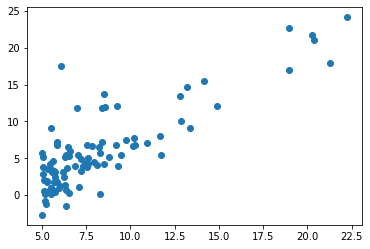

In [150]:
#I plot the data, and I want to fit a linear regression to this data points.
plt.scatter(File_data[:,0], File_data[:,1])


In [190]:
# y = w0 + w1*x
from numpy import random
#I used random choice, to choice data points randomly and then split the data to training and testing set
random_row_indices = np.random.choice(File_data.shape[0], size=File_data.shape[0], replace=False)
random_rows_unique = File_data[random_row_indices]


In [191]:
ratio=0.8 #based on the question, I split the data 80% trining set and 20% testing set
totoal_rows=random_rows_unique.shape[0]
training_size=int(totoal_rows*ratio)

In [174]:
training_data=random_rows_unique[0:training_size]
testing_data=random_rows_unique[training_size:]
training_data

array([[ 6.3654 ,  5.3048 ],
       [ 7.3345 ,  4.0259 ],
       [ 5.3077 ,  1.8396 ],
       [ 7.6031 ,  4.9981 ],
       [14.164  , 15.505  ],
       [ 9.1802 ,  6.7981 ],
       [ 7.2259 ,  3.3411 ],
       [ 6.1891 ,  3.1386 ],
       [ 5.4069 ,  0.55657],
       [ 6.4862 ,  6.5987 ],
       [22.203  , 24.147  ],
       [ 8.0959 ,  4.1164 ],
       [10.274  ,  6.7526 ],
       [ 5.7077 ,  1.8451 ],
       [ 9.2482 , 12.134  ],
       [ 8.3829 , 11.886  ],
       [ 6.2742 ,  2.4756 ],
       [ 7.2182 ,  4.8852 ],
       [ 7.6366 ,  4.2959 ],
       [ 5.7107 ,  3.2522 ],
       [20.341  , 20.992  ],
       [ 7.0931 ,  1.0463 ],
       [ 7.5386 ,  3.8845 ],
       [ 5.7292 ,  0.47953],
       [ 6.5159 ,  5.3436 ],
       [ 6.002  ,  0.92695],
       [ 5.4994 ,  1.0173 ],
       [11.7    ,  8.0043 ],
       [11.708  ,  5.3854 ],
       [ 6.4296 ,  3.6518 ],
       [14.908  , 12.054  ],
       [ 9.7687 ,  7.5435 ],
       [ 5.0594 ,  2.8214 ],
       [ 5.8014 ,  1.844  ],
       [ 5.490

In [164]:
training_data.shape

(77, 2)

In [170]:
X=training_data[:,0]
X.shape

(77,)

In [180]:
#In the first question, I used the  normal equation to find the coeffients of the linear regression
#y = w0 + w1*x
#teta=(xT X)^-1 xT y
y=training_data[:,1]  
X=training_data[:,0]
X = X.reshape(-1, 1) 
X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))



#these are the element that will be used for in the teta=(xT X)^-1 xT y for finding teta (coeffients)

X_transpose=np.transpose(X_augmented)

A=np.matmul(X_transpose, X_augmented)

Inverse = np.linalg.inv(A) 

B=np.matmul(Inverse, X_transpose)

C=np.matmul(B, y)

w0, w1 = C[0], C[1] # these are the coeffients of the linear reggresion
print(f"Intercept (w0): {w0}")
print(f"Slope (w1): {w1}")

Intercept (w0): -4.479991628841214
Slope (w1): 1.2543221605003505


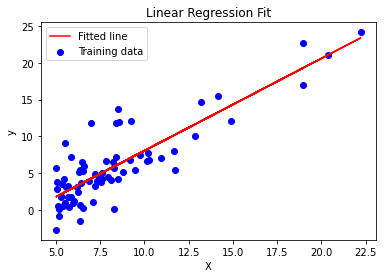

In [181]:
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X, w0 + w1 * X, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

Queston1
Method 2

Method 2: Stochastic gradient Descent

Use stochastic Gradient Descent to find the coefficients of the linear model. Plot MSE vs. iteration for both the training set and testing set in one figure. Hint: Your code should include
Weights initialization. [2]
A loop updating the parameters based on the gradient (See Slide 22). The termination conditions of the loop should at least include the maximum iteration number and the cost function threshold. [10]
For each loop, MSE on the training and testing dataset should be calculated and stored for plotting. [3]
Use different learning rates (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01) to fit the model. Determine the best learning rate.

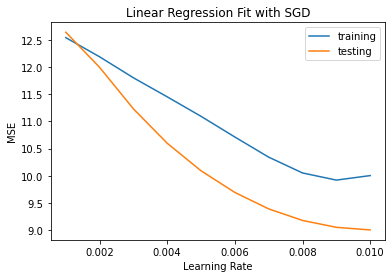

In [239]:

training_data=random_rows_unique[0:training_size]
testing_data=random_rows_unique[training_size:]

ratio=0.8
total_rows=random_rows_unique.shape[0]
training_size=int(total_rows*ratio)

training_data=random_rows_unique[0:training_size]
testing_data=random_rows_unique[training_size:]


import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error 


total_rows=training_data.shape[0]
total_columns=training_data.shape[1]


training_data=random_rows_unique[0:training_size]
testing_data=random_rows_unique[training_size:]
#Weights initialization
w0=0.1
w1=0.3

MSE_train_sgd=[] # empty list for finding MSE and then plotting them against learning rate
MSE_test_sgd=[]
learning_rate=[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

for j  in learning_rate: # I used two loops. One for the different learning rate and one for moving across the rows. Because in 
                         #Stochastic Gradient, I only used one sample in each iteration.
  
    for i in range(total_rows): # I wrote this for Stochastic Gradient. Because I only used one sample in each iteratio
        
        x_i = training_data[i][0]
        y_i = training_data[i][1]
    
        h = w0 + w1*(x_i) # h is the prediction and then I computed the w0 and w1 in the loop.
        
        w0 = w0 + j*( y_i-h)
        w1 = w1 + j*( y_i-h)*(x_i)
        
        
    Y_pred_train=w0+w1*training_data[:,0] #after finding the w0 and w1, I computed the y_predction and computed the MSE for 
    #both training and testing set. 
        
    MSE_training=mean_squared_error(training_data[:,1],Y_pred_train)
        
    MSE_train_sgd.append(MSE_training)  
        
    #mse_testing_data
    
    Y_true_test=testing_data[:,1]
     
    Y_pred_test=w0 + w1*testing_data[:,0]
    MSE_testing=mean_squared_error(Y_true_test,Y_pred_test)
    MSE_test_sgd.append(MSE_testing)


Y_pred_test
plt.plot(learning_rate,MSE_train_sgd, label='training') # I plot the MSE against the learning rate.
plt.plot(learning_rate,MSE_test_sgd, label='testing')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Linear Regression Fit with SGD')
plt.legend()
plt.show()
#Based on the result, the mse for both set in decreasing.

In [261]:
#The best MSE and learning rate
best_mse_train = np.min(MSE_train_sgd) 
best_mse_test = np.min(MSE_test_sgd) 
best_learning_rate_test = learning_rate[np.argmin(MSE_test_sgd)]  # Learning rate corresponding to best testing MSE
best_learning_rate_test

0.01

In [217]:
ratio=0.8
total_rows=random_rows_unique.shape[0]
training_size=int(totoal_rows*ratio)

Method 3: batch gradient descent Use batch gradient descent to repeat all the steps in SGD.

Compare the best result of SGD with that of BGD in terms of accuracy (of the testing set) and speed of convergence with discussion.

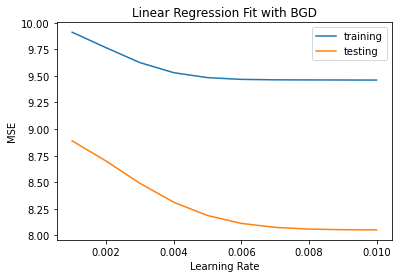

In [240]:
#Weights initialization.
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error 


total_rows=training_data.shape[0]
total_columns=training_data.shape[1]


training_data=random_rows_unique[0:training_size]
testing_data=random_rows_unique[training_size:]
#Here, in the batch gradient descent, I used the whole date set for every iteration for finding the w0 and w1
#Then, by finding the w0 and w1, I computed the y_pred and computed the MSE.

MSE_train_bgd=[]
MSE_test_bgd=[]
learning_rate=[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]



for j  in learning_rate:
    sum_error_w0 = 0.001 #I put these parameters in the loop, becuase I wanted every loop over learning rate satrt from same 
                        #initialization values
    sum_error_w1 = 0.002
    
    for i in range(total_rows): 
        
        x_i = training_data[i][0]
        y_i = training_data[i][1]
    
        h = w0 + w1*(x_i)
        error=y_i-h
        sum_error_w0=sum_error_w0+error
        sum_error_w1=sum_error_w1+(error*x_i)
        
        
    w0 = w0 +j*(sum_error_w0/total_rows)
    w1 = w1 +j*(sum_error_w1/total_rows)
        
        
        
    Y_pred_train=w0+w1*training_data[:,0]
        
    MSE_training=mean_squared_error(training_data[:,1],Y_pred_train)
        
    MSE_train_bgd.append(MSE_training)  
        
    #mse_testing_data
    
    Y_true_test=testing_data[:,1]
     
    Y_pred_test=w0 + w1*testing_data[:,0]
    MSE_testing=mean_squared_error(Y_true_test,Y_pred_test)
    MSE_test_bgd.append(MSE_testing)


plt.plot(learning_rate,MSE_train_bgd, label='training')
plt.plot(learning_rate,MSE_test_bgd, label='testing')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Linear Regression Fit with BGD')
plt.legend()
#Based on the results, the MSE is decreasing.

In [262]:
#The best MSE and learning rate
best_mse_train_1 = np.min(MSE_train_bgd) 
best_mse_test_1 = np.min(MSE_test_bgd) 
best_learning_rate_test = learning_rate[np.argmin(MSE_test_bgd)]  # Learning rate corresponding to best testing MSE
best_learning_rate_test

0.01

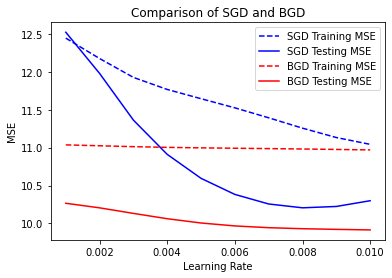

In [237]:
#Comparison of SGD and BGD

plt.plot(learning_rate, MSE_train_sgd, label='SGD Training MSE', color='blue', linestyle='--')
plt.plot(learning_rate, MSE_test_sgd, label='SGD Testing MSE', color='blue')

plt.plot(learning_rate, MSE_train_bgd, label='BGD Training MSE', color='red', linestyle='--')
plt.plot(learning_rate, MSE_test_bgd, label='BGD Testing MSE', color='red')

plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Comparison of SGD and BGD')
plt.legend()
plt.show()

Compare the best result of SGD with that of BGD in terms of accuracy (of the testing set) and speed of
convergence with discussion. 

##### Based on the result, the BGD has lower mse which shows better generalization performance.
##### SGD has higher MSE. becuase it uses one example of data in each iteration which will resulting in 
##### deviating from the global minimum when the loss function is minimizing.
##### SGD converges faster. Because it uses one sample each time. BGD is lower but more stable.

Question 2 Logistic Regression Practice [15 pts, 5 pts for each sub-question]
In this part, you will face a real-world dataset, and use Logistic Regression to make the classification.


1) Step 1: Download and read the data. Split the dataset and apply Logistic Regression to classify
different categories.
You need to download the file from the link. Recall the code in the Question 1. Please load the data
and split the training set and the testing set.
Scikit Learn is the most used machine learning package. Use the
sklearn.linear_model.LogisticRegression to make the classification. You can refer to the doc to check
the function’s parameters and see one example.



2) Step2 Logistic Regression with penalty item
Find the optimal lambda of logistic regression with l1 and l2 norm penalty with the function
sklearn.linear_model.LogisticRegressionCV.
3) Compare the results of these models in terms of accuracy, and feature number. Try to analyze
and give insights into the data by the models.


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Load the dataset
df = pd.read_csv(r'C:\Users\sheba\Desktop\Stevens_semester1\applied ML\week2\breast+cancer+wisconsin+diagnostic\wdbc.data', header=None)


In [246]:
df.columns = df.columns.astype(str)
column_names = ['ID', 'Diagnosis', 
                'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 
                'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry', 
                'Mean Fractal Dimension', 'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 
                'Smoothness SE', 'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE', 
                'Fractal Dimension SE', 'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 
                'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 
                'Worst Symmetry', 'Worst Fractal Dimension']

df.columns = column_names


In [247]:
X = df.drop(labels=['Diagnosis'], axis=1)
y = df['Diagnosis']


In [248]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.25, shuffle=True)

In [249]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


In [250]:
y_predict = clf.predict(X_test)


In [117]:
from sklearn import metrics


In [251]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

array([[ 1, 86],
       [ 0, 56]], dtype=int64)

In [123]:
from sklearn.metrics import classification_report


In [252]:
target_names = ['benigns', 'malignant']
print(classification_report(y_test, y_predict, target_names=target_names))


              precision    recall  f1-score   support

     benigns       1.00      0.01      0.02        87
   malignant       0.39      1.00      0.57        56

    accuracy                           0.40       143
   macro avg       0.70      0.51      0.29       143
weighted avg       0.76      0.40      0.24       143



Step2 Logistic Regression with penalty item Find the optimal lambda of logistic regression with l1 and l2 norm penalty with the function sklearn.linear_model.LogisticRegressionCV.

In [253]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(Cs=10, cv=5, random_state=0, penalty='l1', solver='liblinear').fit(X_train, y_train)

best_C = model.C_[0]
best_C

C:\Users\sheba\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sheba\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sheba\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sheba\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sheba\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sheba\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number 

166.81005372000558

In [254]:
y_predict_cv = model.predict(X_test)


In [255]:
target_names = ['benigns', 'malignant']
print(classification_report(y_test, y_predict_cv, target_names=target_names))


              precision    recall  f1-score   support

     benigns       0.98      0.97      0.97        87
   malignant       0.95      0.96      0.96        56

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



The first model( logistic regression) has lower accuracy (40%) and it could not detect benign cases. which is not good
However,The The overall accuracy of 97% shows a significant improvement for logistic regression with l1 and l2 norm penalty shows better performance. It detects more true positves.
and the model performs very well for both classes ( Benign and malignant).